In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class Agent():
    def __init__(self, render=0, w=[]):
        if(render==0):
            self.env = gym.make("LunarLander-v2")
        else:
            self.env = gym.make("LunarLander-v2", render_mode="human")
        self.env.reset()
        self.reward_array=[]
        self.num_features=self.env.observation_space.shape[0]
        self.num_actions=self.env.action_space.n
        if(len(w)==0):
           self.w=np.random.normal(size=(self.num_features*self.num_actions), loc=0.5, scale=0.001)
        else:
           self.w=w
        self.num_episodes=500
        self.num_steps=100
        self.action_value=0.0
        self.gamma=0.8
        self.alpha=0.001

    def compute_action_state(self,state,action):
        # print(f'state={state}, action={action}')
        return np.array([state[j//self.num_actions] if (j-action)%self.num_actions==0 else 0 for j in range(self.num_features*self.num_actions)])

    def compute_action_value(self,state,action):
        action_state=self.compute_action_state(state,action)
        # print(action_state)
        return np.dot(action_state, self.w)
    
    def epsilon_greedy(self,state):
        epsilon=0.05
        value_array=[]
        for action in range(self.num_actions):
            value=self.compute_action_value(state,action)
            value_array.append(value)
        action_greedy=np.argmax(np.array(value_array))
        action_array=np.arange(self.num_actions)
        action_array=np.insert(action_array,0,action_greedy)
        prob_array=np.ones(self.num_actions)*epsilon/self.num_actions
        prob_array=np.insert(prob_array,0,1-epsilon)
        action_actual=np.random.choice(a=action_array, p=prob_array)
        return action_actual
   
    def Q_Learn(self):
        for ep in range(self.num_episodes):
            state=self.env.reset()[0]
            cum_reward=0
            for step in range(self.num_steps):
                action=self.epsilon_greedy(state)
                curr_action_state=self.compute_action_state(state,action)
                next_state, reward, terminated, truncated, _=self.env.step(action)
                cum_reward+=reward
                next_action=self.epsilon_greedy(next_state)
                curr_action_value=self.compute_action_value(state,action)
                next_action_value=self.compute_action_value(next_state, next_action)
                computed_action_value=reward+self.gamma*next_action_value
                delta_w=self.alpha*(computed_action_value-curr_action_value)*curr_action_state
                self.w+=delta_w
                state=next_state
                print(f'Step {step} of episode {ep}...')
                if terminated or truncated:
                    print(f'Episode {ep} completed !!')
                    break
            self.reward_array.append(cum_reward)

    def graph_plotter(self):
        time=np.arange(len(self.reward_array))
        plt.plot(time,self.reward_array)
        plt.show()


Step 0 of episode 0...
Step 1 of episode 0...
Step 2 of episode 0...
Step 3 of episode 0...
Step 4 of episode 0...
Step 5 of episode 0...
Step 6 of episode 0...
Step 7 of episode 0...
Step 8 of episode 0...
Step 9 of episode 0...
Step 10 of episode 0...
Step 11 of episode 0...
Step 12 of episode 0...
Step 13 of episode 0...
Step 14 of episode 0...
Step 15 of episode 0...
Step 16 of episode 0...
Step 17 of episode 0...
Step 18 of episode 0...
Step 19 of episode 0...
Step 20 of episode 0...
Step 21 of episode 0...
Step 22 of episode 0...
Step 23 of episode 0...
Step 24 of episode 0...
Step 25 of episode 0...
Step 26 of episode 0...
Step 27 of episode 0...
Step 28 of episode 0...
Step 29 of episode 0...
Step 30 of episode 0...
Step 31 of episode 0...
Step 32 of episode 0...
Step 33 of episode 0...
Step 34 of episode 0...
Step 35 of episode 0...
Step 36 of episode 0...
Step 37 of episode 0...
Step 38 of episode 0...
Step 39 of episode 0...
Step 40 of episode 0...
Step 41 of episode 0...
St

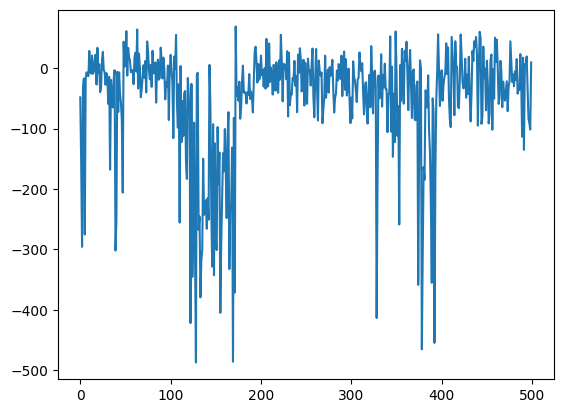

In [23]:
agent=Agent(render=0)
agent.Q_Learn()
agent.graph_plotter()

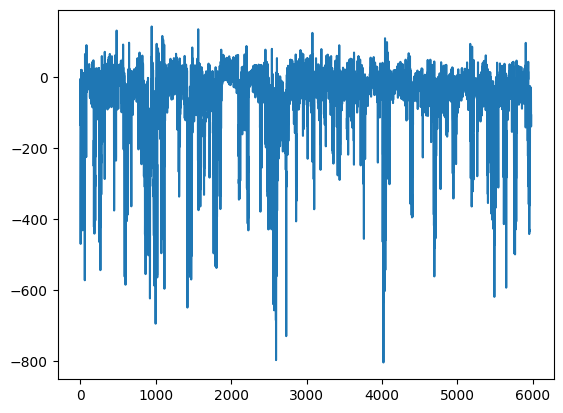

In [12]:
agent.graph_plotter()